**Hypothesis-** Participation in extracurricular activities positively impacts students' exam performance, and this impact may vary across genders.

In [155]:
import pandas as pd

In [157]:
data= pd.read_csv("StudentPerformanceFactors.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In the code above: I am loading the csv and converting it into a Pandas Dataframe. I have used the variable name data to load the data of the csv file.
I am using the dataset found in kaggle: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors. The dataset  provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In the code above: I have used info method to find the summary of the dataframe structure. After running the code, we can see there are some missing data in the dataset, such as parental education level and distance from home. The total entries in this dataset is 6607. Moreover, we can see the data type of each column, some are int64 while others are object data type.

In [161]:
data['Extracurricular_Activities'] = data['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})

In the code above, the code converts the categorical values in the Extracurricular_Activities column of the data DataFrame into numerical values. Specifically, it replaces "Yes" with 1 and "No" with 0. This transformation is useful for numerical analysis and modeling, as many machine learning algorithms and statistical methods require numerical inputs. By mapping these values, the column is effectively converted into a binary format, representing participation in extracurricular activities as 1 and non-participation as 0.

In [163]:
grouped_gender_extra = data.groupby(['Gender', 'Extracurricular_Activities'])['Exam_Score'].mean().reset_index()
print(grouped_gender_extra)

   Gender  Extracurricular_Activities  Exam_Score
0  Female                           0   66.868536
1  Female                           1   67.504843
2    Male                           0   66.978403
3    Male                           1   67.396325


The code groups the data DataFrame by the columns Gender and Extracurricular_Activities and calculates the mean of the Exam_Score for each group. The groupby method organizes the data into groups based on unique combinations of Gender and Extracurricular_Activities, while the .mean() function calculates the average exam score for each group. The result is then converted into a new DataFrame using .reset_index(), making it easy to work with. Finally, the print statement displays this summary table, showing the average exam scores for each gender and extracurricular activity combination.

In [165]:
attendance_summary = data.groupby('School_Type')['Attendance'].agg(['mean', 'median', 'max']).reset_index()
print(attendance_summary)

  School_Type       mean  median  max
0     Private  80.303136    80.0  100
1      Public  79.835146    80.0  100


The code groups the data by School_Type and calculates summary statistics (mean, median, and maximum) for the Attendance column within each school type. The groupby method organizes the data by unique School_Type values, and the .agg(['mean', 'median', 'max']) computes the specified statistics for each group. The .reset_index() converts the grouped data into a readable DataFrame, which is then printed, showing the average, median, and highest attendance for each school type.

In [167]:
pivot_table_scores = data.pivot_table(values='Exam_Score', index='Gender', columns='Peer_Influence', aggfunc='mean')
print(pivot_table_scores)

Peer_Influence   Negative    Neutral   Positive
Gender                                         
Female          66.710744  67.161230  67.615247
Male            66.449482  67.223831  67.629022


The code creates a pivot table that calculates the mean Exam_Score for each combination of Gender (rows) and Peer_Influence (columns). The pivot_table method uses Gender as the index, Peer_Influence as the columns, and aggregates the Exam_Score values using the mean function. This results in a table where each cell represents the average exam score for a specific gender and peer influence level. The print statement displays the pivot table, summarizing the relationship between gender, peer influence, and exam performance.

In [169]:
pivot_table_attendance = data.pivot_table(values=['Attendance', 'Hours_Studied'], 
                                          index='Parental_Education_Level', 
                                          aggfunc='mean')
print(pivot_table_attendance)

                          Attendance  Hours_Studied
Parental_Education_Level                           
College                    79.966315      19.847662
High School                79.736891      20.039715
Postgraduate               80.572414      19.963985


The code creates a pivot table that calculates the mean of Attendance and Hours_Studied for each unique value in the Parental_Education_Level column. The pivot_table method groups the data by Parental_Education_Level as the index and computes the average of Attendance and Hours_Studied for each group. The resulting table summarizes how parental education levels relate to students' attendance and study hours. The print statement displays this summary for easy interpretation.

In [171]:
mean_hours = data['Hours_Studied'].mean()
median_hours = data['Hours_Studied'].median()
mode_hours = data['Hours_Studied'].mode()[0]

In [173]:
mean_attendance = data['Attendance'].mean()
median_attendance = data['Attendance'].median()
mode_attendance = data['Attendance'].mode()[0]

In [175]:
grouped_scores = data.groupby('Extracurricular_Activities')['Exam_Score'].mean()

This code calculates key summary statistics for Hours_Studied and Attendance, including their mean, median, and mode. It also analyzes the relationship between extracurricular activities and exam scores by grouping the data based on Extracurricular_Activities and computing the average Exam_Score for each group. These calculations provide insights into study habits, attendance patterns, and the impact of extracurricular participation on academic performance.

In [177]:
print("Hours Studied - Mean:", mean_hours, "Median:", median_hours, "Mode:", mode_hours)
print("Attendance - Mean:", mean_attendance, "Median:", median_attendance, "Mode:", mode_attendance)
print("Mean Exam Score by Extracurricular Activities:")
print(grouped_scores)

Hours Studied - Mean: 19.975329196306948 Median: 20.0 Mode: 20
Attendance - Mean: 79.97744816104132 Median: 80.0 Mode: 67
Mean Exam Score by Extracurricular Activities:
Extracurricular_Activities
0    66.931435
1    67.441849
Name: Exam_Score, dtype: float64


This code prints the summary statistics for Hours_Studied and Attendance, including their mean, median, and mode, to provide a clear overview of students' study and attendance patterns. Additionally, it displays the mean Exam_Score grouped by Extracurricular_Activities, highlighting how participation in extracurricular activities correlates with average exam performance. These outputs summarize key insights from the data in a straightforward and interpretable format.

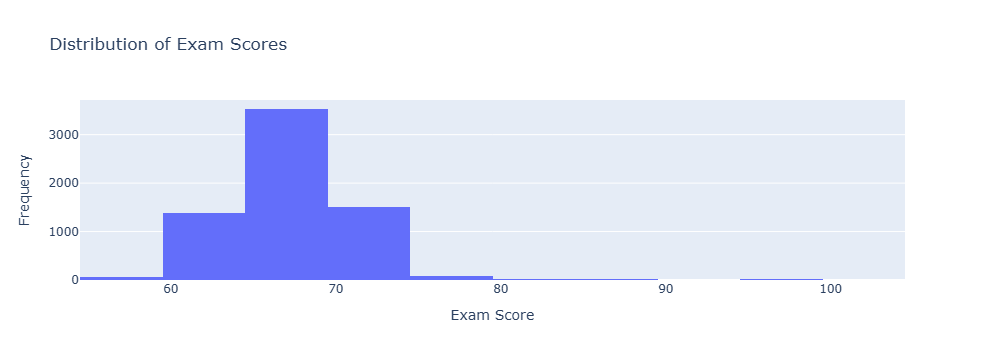

In [179]:
fig1 = px.histogram(data, x='Exam_Score', nbins=10, title="Distribution of Exam Scores")
fig1.update_layout(xaxis_title="Exam Score", yaxis_title="Frequency")
fig1.show()

This code creates a histogram using Plotly Express to visualize the distribution of exam scores in the dataset. The x axis represents the "Exam_Score" column from the dataset, and the histogram is divided into 10 bins (nbins=10). The chart's title is set to "Distribution of Exam Scores," while custom axis labels "Exam Score" (x-axis) and "Frequency" (y-axis) are added for clarity. The fig1.show() command displays the interactive histogram.

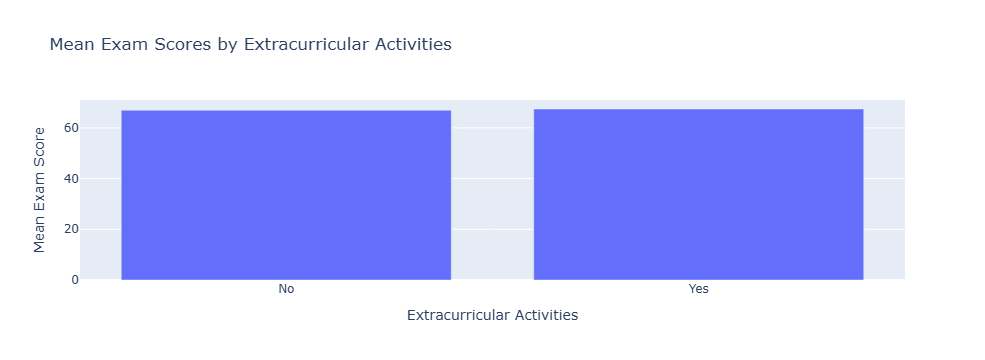

In [181]:
grouped_scores_df = grouped_scores.reset_index()
grouped_scores_df['Extracurricular_Activities'] = grouped_scores_df['Extracurricular_Activities'].map({1: "Yes", 0: "No"})
fig2 = px.bar(grouped_scores_df, x='Extracurricular_Activities', y='Exam_Score',
              title="Mean Exam Scores by Extracurricular Activities",
              labels={'Exam_Score': 'Mean Exam Score', 'Extracurricular_Activities': 'Extracurricular Activities'})
fig2.show()

This code creates a bar chart using Plotly Express to compare the mean exam scores based on participation in extracurricular activities. The grouped_scores DataFrame is first reset to include the index as a column. The Extracurricular_Activities column is then mapped to meaningful labels, replacing 1 with "Yes" and 0 with "No" for clarity. The bar chart (fig2) is created with the x-axis representing extracurricular participation ("Yes" or "No") and the y-axis showing the mean exam score. The chart's title is "Mean Exam Scores by Extracurricular Activities," and custom labels are added for both axes. The fig2.show() command displays the interactive bar chart.

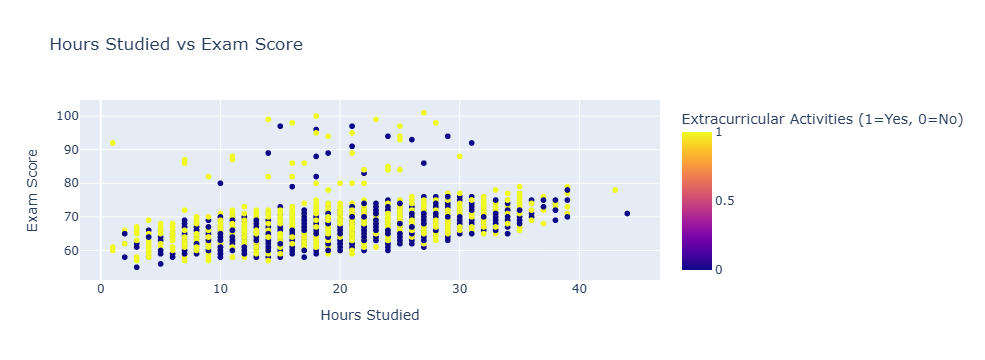

In [183]:
fig3 = px.scatter(data, x='Hours_Studied', y='Exam_Score', color='Extracurricular_Activities',
                  color_discrete_map={1: 'orange', 0: 'blue'},
                  labels={'Extracurricular_Activities': 'Extracurricular Activities (1=Yes, 0=No)'},
                  title="Hours Studied vs Exam Score")
fig3.update_layout(xaxis_title="Hours Studied", yaxis_title="Exam Score")
fig3.show()

This code creates a scatter plot using Plotly Express to visualize the relationship between hours studied and exam scores, with points colored based on participation in extracurricular activities. The x axis represents "Hours_Studied," and the y axis represents "Exam_Score." Points are color-coded using a discrete map: 1 (Yes) is orange, and 0 (No) is blue. The legend is labeled for clarity as "Extracurricular Activities (1=Yes, 0=No)." The chart title is "Hours Studied vs Exam Score," and custom axis titles ("Hours Studied" and "Exam Score") are set for readability. The fig3.show() displays the interactive scatter plot.

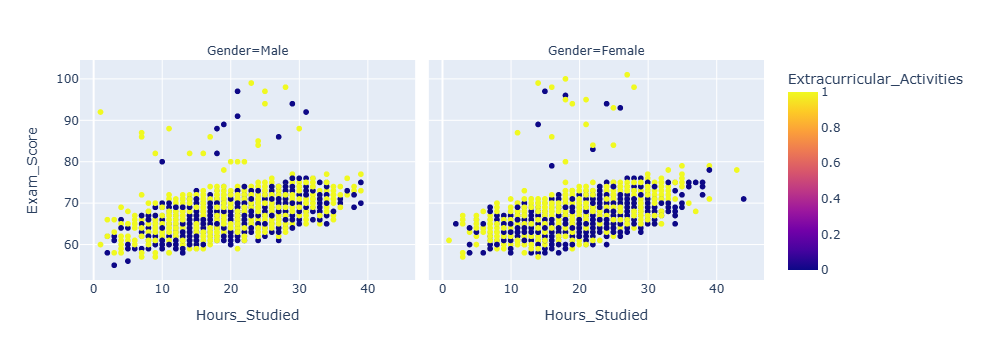

In [192]:
px.scatter(data, x='Hours_Studied', y='Exam_Score', facet_col='Gender', color='Extracurricular_Activities')

This code creates a scatter plot using Plotly Express to explore the relationship between hours studied and exam scores, further segmented by gender and extracurricular participation. The x axis represents "Hours_Studied," and the y axis represents "Exam_Score." The facet_col='Gender' parameter splits the plot into separate subplots for each gender, allowing for a comparison across genders. Points are colored based on the "Extracurricular_Activities" column, providing additional insights into how extracurricular participation correlates with hours studied and exam scores within each gender. This visualization helps highlight patterns across multiple dimensions.

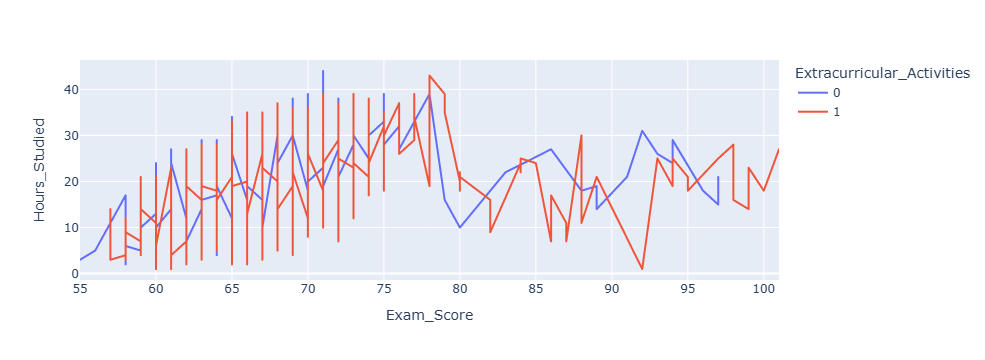

In [187]:
px.line(data.sort_values('Exam_Score'), x='Exam_Score', y='Hours_Studied', color='Extracurricular_Activities')

This code creates a line plot using Plotly Express to show the relationship between exam scores and hours studied, sorted by "Exam_Score." The x axis represents "Exam_Score," and the y axis represents "Hours_Studied." Lines are color-coded based on the "Extracurricular_Activities" column, distinguishing the data for participants and non-participants. By sorting the data by "Exam_Score," the plot ensures a smooth progression of scores, helping to visualize trends in study time relative to performance across extracurricular activity groups.

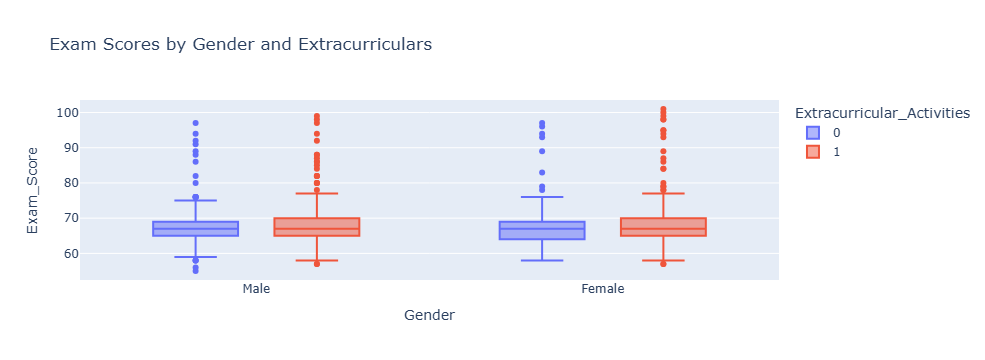

In [190]:
px.box(data, x='Gender', y='Exam_Score', color='Extracurricular_Activities', title="Exam Scores by Gender and Extracurriculars")

This code generates a box plot using Plotly Express to compare the distribution of exam scores across genders, with further differentiation by extracurricular participation. The x axis represents "Gender," while the y axis represents "Exam_Score." The data is color-coded by "Extracurricular_Activities" to separate participants and non-participants within each gender category. The title, "Exam Scores by Gender and Extracurriculars," provides context for the visualization, which highlights variations in exam performance by gender and extracurricular involvement. Box plots summarize key statistical measures like medians, quartiles, and outliers.

Conclusion: The analysis suggests that participating in extracurricular activities positively correlates with higher exam scores, regardless of gender. While hours studied is an important determinant of performance, the variability in scores underscores the need to consider other factors like learning strategies and individual differences. These insights support the hypothesis that engagement beyond academics may enhance overall performance, likely by promoting skills such as time management and focus.